In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#### Step 1:
Load, preprocess, analyze the dataset and make it ready for training. You can refer to Assignment 2: Part 1 - Data Analysis steps. Applying the right
preprocessing techniques can help you increase the accuracy. Refer here for
more details on preprocessing methods.

In [2]:
income_df = pd.read_csv("income_dataset.csv")
income_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,Some-college,10,Never-married,Protective-serv,Not-in-family,0,0,40,United-States,<=50K
32557,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K
32558,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K
32559,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K


In [3]:
# check for the count of NA values in each feature
income_df.isna().sum()

age               0
workclass         0
fnlwgt            1
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
# Compution the shape of the dataset
income_df.shape

(32561, 13)

In [5]:
# checking for the different categories of income
income_df["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
# Visualizing the key statistics of the dataset
income_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# counting the number of samples where workclass is "?"
income_df[income_df["workclass"] == "?"].count()

age               1836
workclass         1836
fnlwgt            1835
education         1836
education.num     1836
marital.status    1836
occupation        1836
relationship      1836
capital.gain      1836
capital.loss      1836
hours.per.week    1836
native.country    1836
income            1836
dtype: int64

In [8]:
# counting the number of samples where occupation is "?"
income_df[income_df["occupation"] == "?"].count()

age               1843
workclass         1843
fnlwgt            1842
education         1843
education.num     1843
marital.status    1843
occupation        1843
relationship      1843
capital.gain      1843
capital.loss      1843
hours.per.week    1843
native.country    1843
income            1843
dtype: int64

In [9]:
# counting the number of samples where native.country is "?"
income_df[income_df["native.country"] == "?"].count()

age               583
workclass         583
fnlwgt            583
education         583
education.num     583
marital.status    583
occupation        583
relationship      583
capital.gain      583
capital.loss      583
hours.per.week    583
native.country    583
income            583
dtype: int64

In [10]:
# replacing all "?" values with "NaN"
income_df = income_df.replace("?",np.nan)
income_df.isna().sum()

age                  0
workclass         1836
fnlwgt               1
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [11]:
# dropping all samples with NaN to clean dataset since the samples with NaN in workclass, occupation and native.country
# are reletively low when to the total number of samples
income_df_opt1 = income_df.dropna(axis = 0)
income_df_opt1.shape

(30162, 13)

## Data Visualization:

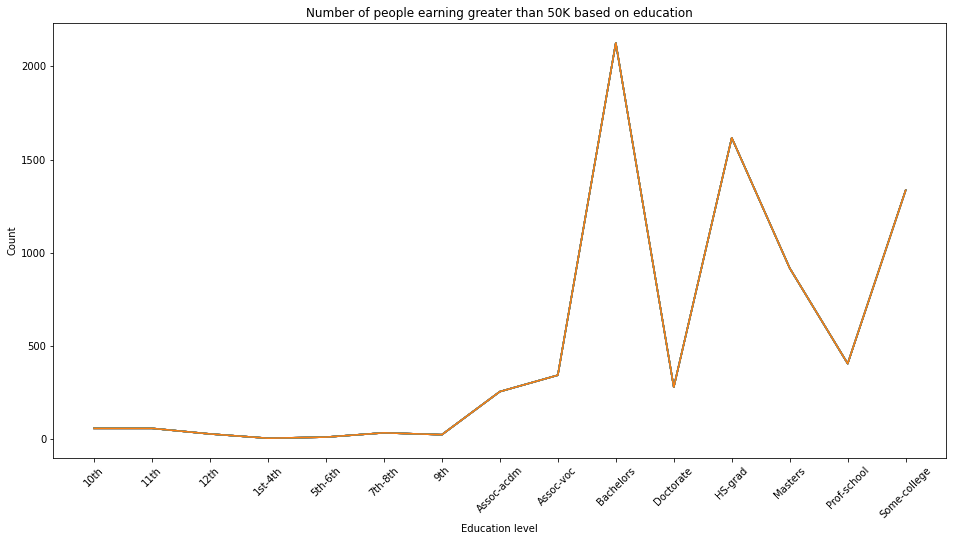

In [12]:
# Plot1: understanding the income above 50K distribution based on education
plt.figure(figsize = (16,8))
plt.plot(income_df_opt1[income_df_opt1["income"] == ">50K"].groupby("education").count())
plt.title("Number of people earning greater than 50K based on education")
plt.xlabel("Education level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

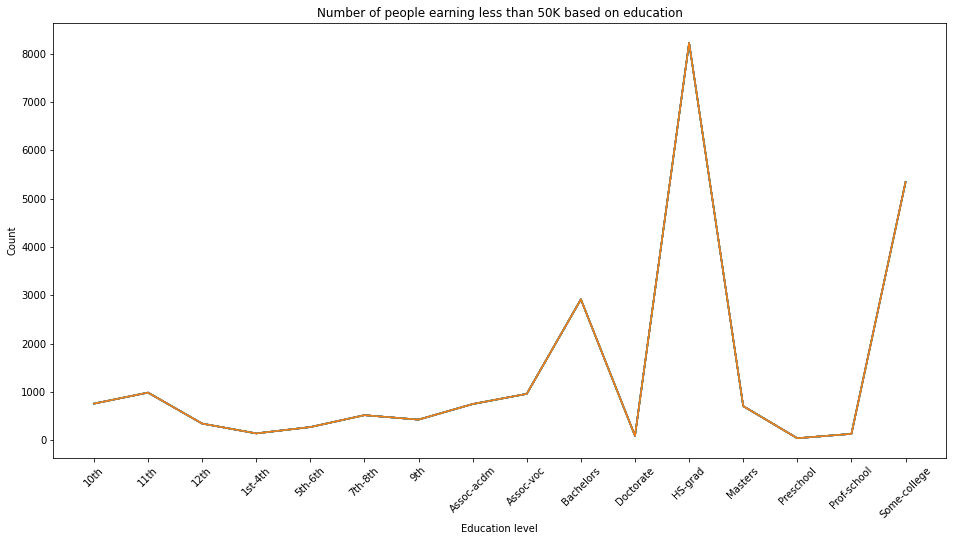

In [13]:
# Plot 2: understanding the income below 50K distribution based on education
plt.figure(figsize = (16,8))
plt.plot(income_df_opt1[income_df_opt1["income"] == "<=50K"].groupby("education").count())
plt.title("Number of people earning less than 50K based on education")
plt.xlabel("Education level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [14]:
# removing the education feature as we have a education.num column for further analysis
income_df_opt1 = income_df_opt1.drop("education", axis = 1)

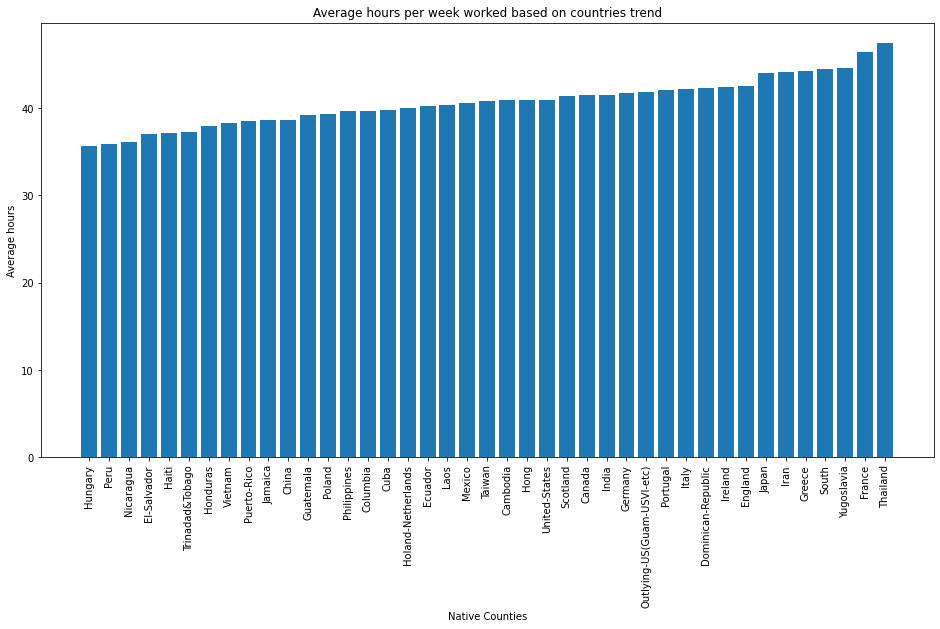

In [15]:
# Plot 3: visualizing the mean number of hours that workclass of a country works for using bar chart
hoursCountry = income_df_opt1.groupby(income_df_opt1["native.country"], as_index = False).agg({"hours.per.week":"mean"})
hoursCountry = hoursCountry.sort_values("hours.per.week")
plt.figure(figsize = (16,8))
plt.title("Average hours per week worked based on countries trend")
plt.bar(x = hoursCountry["native.country"], height = hoursCountry["hours.per.week"])
plt.ylabel("Average hours")
plt.xlabel("Native Counties")
plt.xticks(rotation=90)
plt.show()

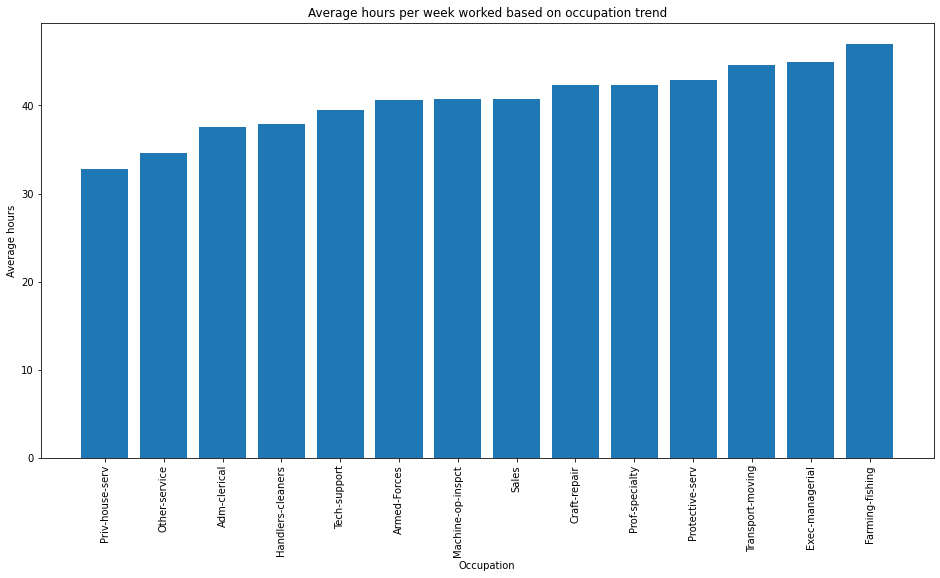

In [16]:
# Plot 4: Visualizing the mean dictribution of working hours based on the occupation
hoursOccupation = income_df_opt1.groupby(income_df_opt1["occupation"], as_index = False).agg({"hours.per.week":"mean"})
hoursOccupation = hoursOccupation.sort_values("hours.per.week")

plt.figure(figsize = (16,8))
plt.title("Average hours per week worked based on occupation trend")
plt.bar(x = hoursOccupation["occupation"], height = hoursOccupation["hours.per.week"])
plt.ylabel("Average hours")
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.show()

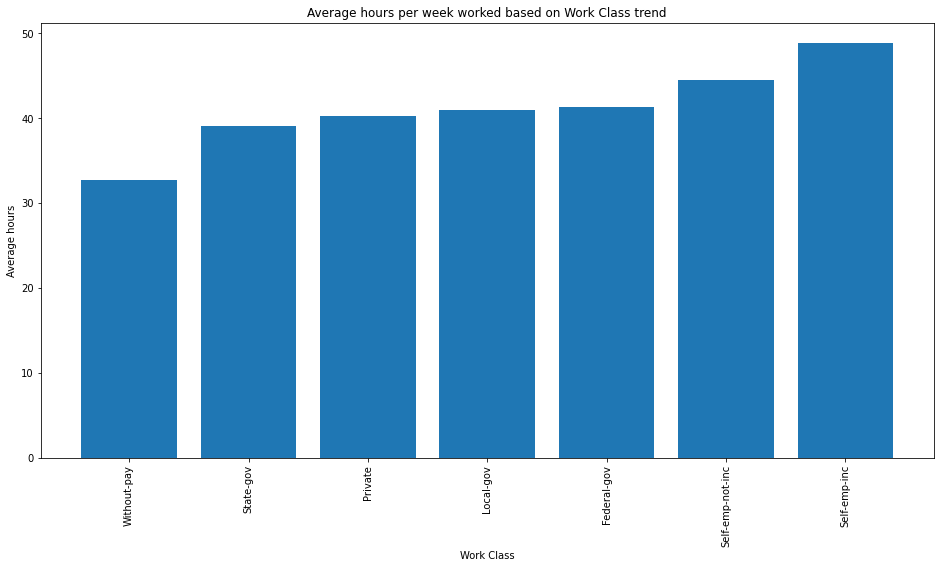

In [17]:
# Plot 5: Visualizing the ditribution of mean working hours based on the workclass
hoursWorkclass = income_df_opt1.groupby(income_df_opt1["workclass"], as_index = False).agg({"hours.per.week":"mean"})
hoursWorkclass = hoursWorkclass.sort_values("hours.per.week")

plt.figure(figsize = (16,8))
plt.title("Average hours per week worked based on Work Class trend")
plt.bar(x = hoursWorkclass["workclass"], height = hoursWorkclass["hours.per.week"])
plt.ylabel("Average hours")
plt.xlabel("Work Class")
plt.xticks(rotation=90)
plt.show()

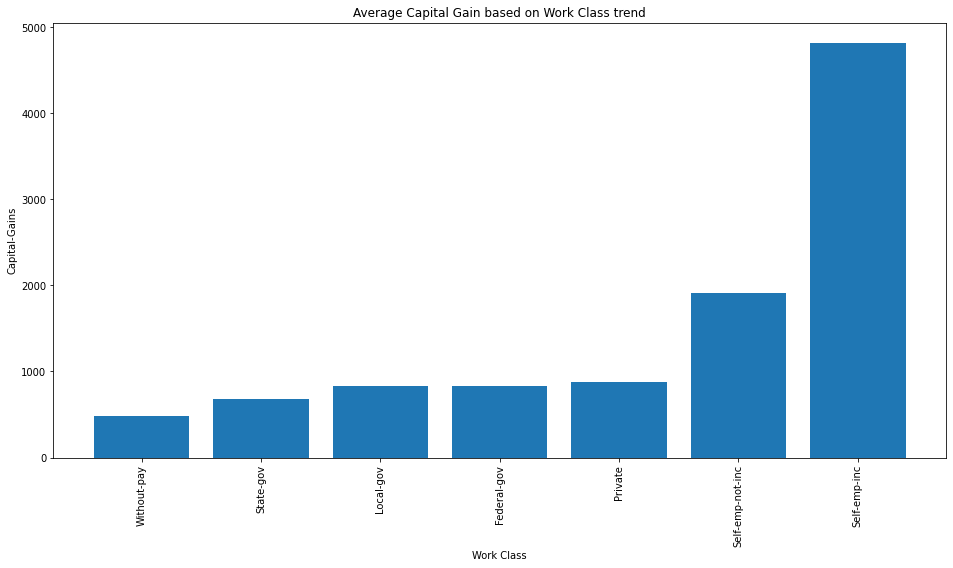

In [18]:
# Plot 6: Visualizing the distrubution of mean Capital Gain based on the workclass
capitalgainWorkclass = income_df_opt1.groupby(income_df_opt1["workclass"], as_index = False).agg({"capital.gain":"mean"})
capitalgainWorkclass = capitalgainWorkclass.sort_values("capital.gain")

plt.figure(figsize = (16,8))
plt.title("Average Capital Gain based on Work Class trend")
plt.bar(x = capitalgainWorkclass["workclass"], height = capitalgainWorkclass["capital.gain"])
plt.ylabel("Capital-Gains")
plt.xlabel("Work Class")
plt.xticks(rotation=90)
plt.show()

Checking for all unique catagorical features in the dataset

In [19]:
income_df_opt1["occupation"].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [20]:
income_df_opt1["relationship"].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [21]:
income_df_opt1["workclass"].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [22]:
income_df_opt1["native.country"].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand',
       'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [23]:
income_df_opt1["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [24]:
# checking the columns of the dataset
income_df_opt1.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [25]:
# observing the general characteristics of the dataset
income_df_opt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  int64  
 1   workclass       30162 non-null  object 
 2   fnlwgt          30162 non-null  float64
 3   education.num   30162 non-null  int64  
 4   marital.status  30162 non-null  object 
 5   occupation      30162 non-null  object 
 6   relationship    30162 non-null  object 
 7   capital.gain    30162 non-null  int64  
 8   capital.loss    30162 non-null  int64  
 9   hours.per.week  30162 non-null  int64  
 10  native.country  30162 non-null  object 
 11  income          30162 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.0+ MB


In [26]:
# creating a temprary numpy array for normalization of numeric data
income_df_opt1_np = income_df_opt1[["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"]].to_numpy()
income_df_opt1_np

array([[8.20000e+01, 1.86061e+05, 9.00000e+00, 0.00000e+00, 4.35600e+03,
        1.80000e+01],
       [5.40000e+01, 1.40359e+05, 4.00000e+00, 0.00000e+00, 3.90000e+03,
        4.00000e+01],
       [4.10000e+01, 2.64663e+05, 1.00000e+01, 0.00000e+00, 3.90000e+03,
        4.00000e+01],
       ...,
       [4.00000e+01, 1.54374e+05, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+01],
       [5.80000e+01, 1.51910e+05, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        4.00000e+01],
       [2.20000e+01, 2.01490e+05, 9.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+01]])

In [27]:
# normalizing the dataset using min-max normalization
def normalization(x):
    return np.divide((x - np.min(x,axis = 0)),(np.max(x, axis = 0) - np.min(x, axis = 0)))

income_df_opt1_np_scaled = normalization(income_df_opt1_np)
income_df_opt1_np_scaled

array([[0.89041096, 0.11713086, 0.53333333, 0.        , 1.        ,
        0.17346939],
       [0.50684932, 0.08606085, 0.2       , 0.        , 0.8953168 ,
        0.39795918],
       [0.32876712, 0.17056758, 0.6       , 0.        , 0.8953168 ,
        0.39795918],
       ...,
       [0.31506849, 0.0955888 , 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.56164384, 0.09391367, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.1276201 , 0.53333333, 0.        , 0.        ,
        0.19387755]])

In [28]:
# creating a temporary dataframe for the normalized data
temp_df = pd.DataFrame(income_df_opt1_np_scaled, columns= ["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"])
temp_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,0.890411,0.117131,0.533333,0.0,1.000000,0.173469
1,0.506849,0.086061,0.200000,0.0,0.895317,0.397959
2,0.328767,0.170568,0.600000,0.0,0.895317,0.397959
3,0.232877,0.138072,0.533333,0.0,0.865473,0.448980
4,0.287671,0.093024,0.333333,0.0,0.865473,0.397959
...,...,...,...,...,...,...
30157,0.068493,0.201493,0.600000,0.0,0.000000,0.397959
30158,0.136986,0.165563,0.733333,0.0,0.000000,0.377551
30159,0.315068,0.095589,0.533333,0.0,0.000000,0.397959
30160,0.561644,0.093914,0.533333,0.0,0.000000,0.397959


In [29]:
# dropping numeric features from the original dataset to make space for the normalized ones
income_df_opt1 = income_df_opt1.drop(labels = ["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"], axis = 1, )

In [30]:
# resetting index
income_df_opt1 = income_df_opt1.reset_index(drop = True)

In [31]:
# combining the original dataset with the temporary dataset
income_df_opt1 = pd.concat([income_df_opt1,temp_df], axis = 1, ignore_index = False)

### Encoding categorical variables using OneHotEncoder from sklean 

In [32]:
income_df_opt1.head()

,workclass,marital.status,occupation,relationship,native.country,income,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,Private,Widowed,Exec-managerial,Not-in-family,United-States,<=50K,0.890411,0.117131,0.533333,0.0,1.000000,0.173469
1,Private,Divorced,Machine-op-inspct,Unmarried,United-States,<=50K,0.506849,0.086061,0.200000,0.0,0.895317,0.397959
2,Private,Separated,Prof-specialty,Own-child,United-States,<=50K,0.328767,0.170568,0.600000,0.0,0.895317,0.397959
3,Private,Divorced,Other-service,Unmarried,United-States,<=50K,0.232877,0.138072,0.533333,0.0,0.865473,0.448980
4,Private,Separated,Adm-clerical,Unmarried,United-States,<=50K,0.287671,0.093024,0.333333,0.0,0.865473,0.397959


In [33]:
income_df_opt1.tail()

,workclass,marital.status,occupation,relationship,native.country,income,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
30157,Private,Never-married,Protective-serv,Not-in-family,United-States,<=50K,0.068493,0.201493,0.600000,0.0,0.0,0.397959
30158,Private,Married-civ-spouse,Tech-support,Wife,United-States,<=50K,0.136986,0.165563,0.733333,0.0,0.0,0.377551
30159,Private,Married-civ-spouse,Machine-op-inspct,Husband,United-States,>50K,0.315068,0.095589,0.533333,0.0,0.0,0.397959
30160,Private,Widowed,Adm-clerical,Unmarried,United-States,<=50K,0.561644,0.093914,0.533333,0.0,0.0,0.397959
30161,Private,Never-married,Adm-clerical,Own-child,United-States,<=50K,0.068493,0.127620,0.533333,0.0,0.0,0.193878


In [34]:
income_df_opt1.dtypes

workclass          object
marital.status     object
occupation         object
relationship       object
native.country     object
income             object
age               float64
fnlwgt            float64
education.num     float64
capital.gain      float64
capital.loss      float64
hours.per.week    float64
dtype: object

In [35]:
# creating a separate dataset for the categorical variables for OneHotEncoding
income_df_opt1_cat = income_df_opt1[["workclass","marital.status","occupation","relationship","native.country"]]

In [36]:
# Initiating the OneHotEncoder object
ohe = OneHotEncoder(drop = "first", sparse = False)

In [37]:
# transforming the income_df_opt1_cat dataframe as one hot encoded values
income_df_opt1_cat_ohe = ohe.fit_transform(income_df_opt1_cat)
income_df_opt1_cat_ohe

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [38]:
# extracting new column names for the above encoded features
NewColName = ohe.get_feature_names_out(["workclass","marital.status","occupation","relationship","native.country"])
len(NewColName)

70

In [39]:
# Creating a temporary dataframe to store all one hot coded features
temp_df2 = pd.DataFrame(income_df_opt1_cat_ohe, columns=NewColName)
temp_df2.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
temp_df2.shape

(30162, 70)

In [41]:
# Dropping the categorical features to make space for the one hot encoded features
income_df_opt1_new = income_df_opt1.drop(["workclass","marital.status","occupation","relationship","native.country"], axis = 1)
income_df_opt1_new.head()

,income,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,<=50K,0.890411,0.117131,0.533333,0.0,1.000000,0.173469
1,<=50K,0.506849,0.086061,0.200000,0.0,0.895317,0.397959
2,<=50K,0.328767,0.170568,0.600000,0.0,0.895317,0.397959
3,<=50K,0.232877,0.138072,0.533333,0.0,0.865473,0.448980
4,<=50K,0.287671,0.093024,0.333333,0.0,0.865473,0.397959


In [42]:
income_df_opt1_new.shape

(30162, 7)

In [43]:
# Concatinationg the original dataframe - income_df_opt1_new with the temporary dataframe
income_df_opt1_new = pd.concat([income_df_opt1_new,temp_df2], axis = 1, ignore_index = False)
income_df_opt1_new["income"] = np.where(income_df_opt1_new["income"].str.contains(">50K"), 1, 0)
income_df_opt1_new

,income,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,0.890411,0.117131,0.533333,0.0,1.000000,0.173469,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0.506849,0.086061,0.200000,0.0,0.895317,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.328767,0.170568,0.600000,0.0,0.895317,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.232877,0.138072,0.533333,0.0,0.865473,0.448980,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.287671,0.093024,0.333333,0.0,0.865473,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0,0.068493,0.201493,0.600000,0.0,0.000000,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30158,0,0.136986,0.165563,0.733333,0.0,0.000000,0.377551,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30159,1,0.315068,0.095589,0.533333,0.0,0.000000,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30160,0,0.561644,0.093914,0.533333,0.0,0.000000,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
# Sampling the dataframe to shuffle all samples for unbiased analysis and resetting the index
income_df_opt1_new = income_df_opt1_new.sample(frac = 1)
income_df_opt1_new = income_df_opt1_new.reset_index(drop = True)
income_df_opt1_new

,income,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,0.232877,0.044745,0.800000,0.000000,0.0,0.602041,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0.054795,0.144208,0.600000,0.000000,0.0,0.295918,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.260274,0.172534,0.533333,0.040640,0.0,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.054795,0.157589,0.266667,0.000000,0.0,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0.150685,0.044258,0.800000,0.086141,0.0,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0,0.260274,0.035626,0.800000,0.000000,0.0,0.500000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30158,1,0.246575,0.115594,0.800000,0.000000,0.0,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30159,0,0.575342,0.098739,0.600000,0.000000,0.0,0.561224,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30160,0,0.191781,0.108160,0.133333,0.000000,0.0,0.244898,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
income_df_opt1_new.columns

Index(['income', 'age', 'fnlwgt', 'education.num', 'capital.gain',
       'capital.loss', 'hours.per.week', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship

Separating the features and the target variable for model training

In [46]:
y = income_df_opt1_new["income"]
y

0        0
1        0
2        0
3        0
4        1
        ..
30157    0
30158    1
30159    0
30160    0
30161    0
Name: income, Length: 30162, dtype: int32

In [47]:
X = income_df_opt1_new.drop(["income"], axis = 1)
X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.232877,0.044745,0.800000,0.000000,0.0,0.602041,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.054795,0.144208,0.600000,0.000000,0.0,0.295918,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.260274,0.172534,0.533333,0.040640,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.054795,0.157589,0.266667,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.044258,0.800000,0.086141,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.260274,0.035626,0.800000,0.000000,0.0,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30158,0.246575,0.115594,0.800000,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30159,0.575342,0.098739,0.600000,0.000000,0.0,0.561224,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30160,0.191781,0.108160,0.133333,0.000000,0.0,0.244898,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting data into train and test set for model training and testing

In [48]:
# splitting the test and train set for model training and predictions
seed(1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [49]:
# analysing the respective shapes
print("X_train =",X_train.shape)
print("X_test =",X_test.shape)
print("y_train =",y_train.shape)
print("y_test =",y_test.shape)

X_train = (21113, 76)
X_test = (9049, 76)
y_train = (21113,)
y_test = (9049,)


#### Step 2:
Build and train a basic NN (with max 3 hidden layers).
You can use Tensorflow, Pytorch or Keras as a deep learning framework. Decide
your NN architecture:
- How many input neurons are there?
- What activation function will you choose?
- What is the number of hidden layers? (1, 2 or 3?)
- What is the size of each hidden layer?
- What activation function is used for the hidden and output layer?

# Using Keras

In [50]:
# importing useful libraries to develop neural network model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

In [51]:
# initiating the input shapes for the model
input_shape = X_train.shape

Base model:

In [52]:
# set_random_seed(2)
# setting seed from numpy and tensorflow to avoid discripancy in output with similar inputs
seed(123)
keras.utils.set_random_seed(123)
# building a Neural network model with 3 hidden layers and dropouts
model = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1232      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


In [53]:
%%time
# setting seed from numpy and tensorflow to avoid discripancy in output with similar inputs
seed(123)
keras.utils.set_random_seed(123)
# Model training
batch_size = 128
epoch = 30

model.compile(loss = "BinaryCrossentropy", optimizer= Adam(learning_rate=0.001), metrics=["accuracy"])
model_output = model.fit(X_train, y_train, batch_size=batch_size, epochs=epoch, validation_data = (X_test, y_test))

Epoch 1/30
165/165 [==============================] - 1s 4ms/step - loss: 0.4468 - accuracy: 0.7839 - val_loss: 0.3922 - val_accuracy: 0.8164
Epoch 2/30
165/165 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.8262 - val_loss: 0.3722 - val_accuracy: 0.8262
Epoch 3/30
165/165 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8332 - val_loss: 0.3611 - val_accuracy: 0.8289
Epoch 4/30
165/165 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.8379 - val_loss: 0.3501 - val_accuracy: 0.8379
Epoch 5/30
165/165 [==============================] - 0s 3ms/step - loss: 0.3385 - accuracy: 0.8420 - val_loss: 0.3437 - val_accuracy: 0.8400
Epoch 6/30
165/165 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.8457 - val_loss: 0.3392 - val_accuracy: 0.8440
Epoch 7/30
165/165 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8461 - val_loss: 0.3411 - val_accuracy: 0.8402
Epoch 

In [54]:
# computing training loss for each Epoch and storing in lossTrain variable
lossTrain = model_output.history['loss']
lossTest = model_output.history['val_loss']
AccuracyTrain = model_output.history['accuracy']
AccuracyTest = model_output.history['val_accuracy']

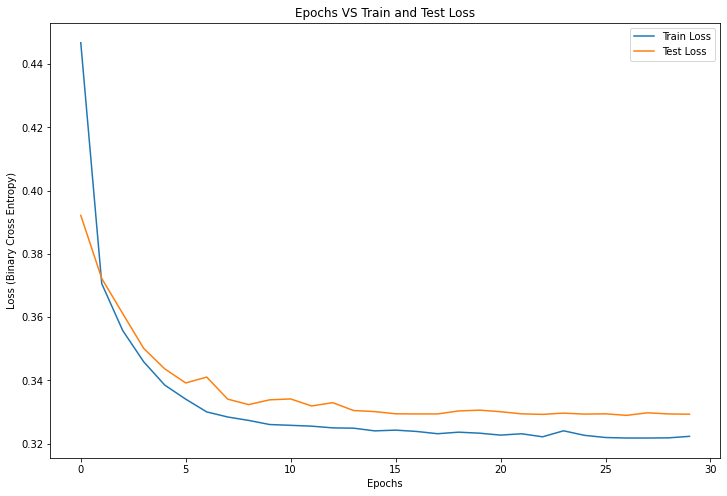

In [55]:
# Plot 7: Comparing the train loss with test loss
plt.figure(figsize=(12,8))
plt.title("Epochs VS Train and Test Loss")
plt.plot(lossTrain, label = "Train Loss")
plt.plot(lossTest, label = "Test Loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss (Binary Cross Entropy)")
plt.show()

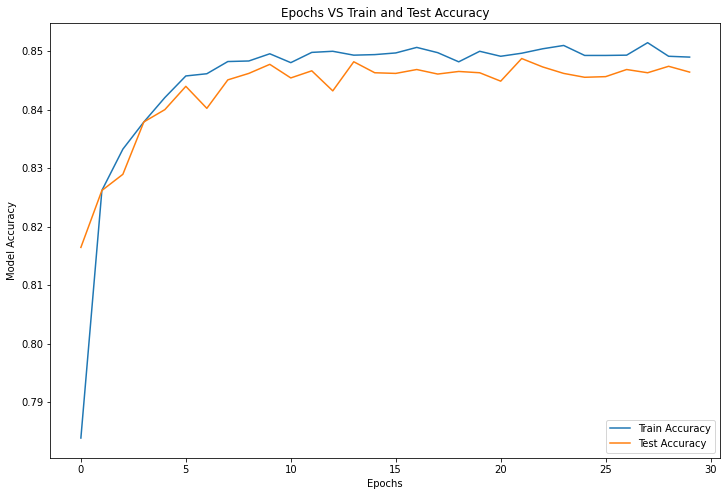

In [56]:
# Plot 8: Comparing train set accuracy with the test set accuracy
plt.figure(figsize=(12,8))
plt.title("Epochs VS Train and Test Accuracy")
plt.plot(AccuracyTrain, label = "Train Accuracy")
plt.plot(AccuracyTest, label = "Test Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.show()

In [57]:
BATCH_SIZE = 128
EPOCHS = 30

### Dropout Tunning:

In [58]:
lossTrainDO = []
lossTestDO = []
AccuracyTrainDO = []
AccuracyTestDO = []
accuracyDictTrainDO = {}
accuracyDictTestDO = {}

In [59]:
modelCheck1 = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

modelCheck1.summary()

modelCheck1.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model_outputCheck1 = modelCheck1.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (X_test, y_test))

# computing training loss for each Epoch and storing in lossTrain variable
lossTrainDO.append(model_outputCheck1.history['loss'])
lossTestDO.append(model_outputCheck1.history['val_loss'])
AccuracyTrainDO.append(model_outputCheck1.history['accuracy'])
AccuracyTestDO.append(model_outputCheck1.history['val_accuracy'])

accuracyDictTrainDO["0.0"] = model_outputCheck1.history['accuracy'][-1]
accuracyDictTestDO["0.0"] = model_outputCheck1.history['val_accuracy'][-1]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                1232      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
165/165 [==============================] 

In [60]:
modelCheck1 = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.3),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.3),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

modelCheck1.summary()

modelCheck1.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model_outputCheck1 = modelCheck1.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (X_test, y_test))

# computing training loss for each Epoch and storing in lossTrain variable
lossTrainDO.append(model_outputCheck1.history['loss'])
lossTestDO.append(model_outputCheck1.history['val_loss'])
AccuracyTrainDO.append(model_outputCheck1.history['accuracy'])
AccuracyTestDO.append(model_outputCheck1.history['val_accuracy'])

accuracyDictTrainDO["0.3"] = model_outputCheck1.history['accuracy'][-1]
accuracyDictTestDO["0.3"] = model_outputCheck1.history['val_accuracy'][-1]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                1232      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
165/165 [==============================] 

In [61]:
modelCheck1 = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.4),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.4),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

modelCheck1.summary()

modelCheck1.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model_outputCheck1 = modelCheck1.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (X_test, y_test))

# computing training loss for each Epoch and storing in lossTrain variable
lossTrainDO.append(model_outputCheck1.history['loss'])
lossTestDO.append(model_outputCheck1.history['val_loss'])
AccuracyTrainDO.append(model_outputCheck1.history['accuracy'])
AccuracyTestDO.append(model_outputCheck1.history['val_accuracy'])

accuracyDictTrainDO["0.4"] = model_outputCheck1.history['accuracy'][-1]
accuracyDictTestDO["0.4"] = model_outputCheck1.history['val_accuracy'][-1]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                1232      
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
165/165 [==============================] 

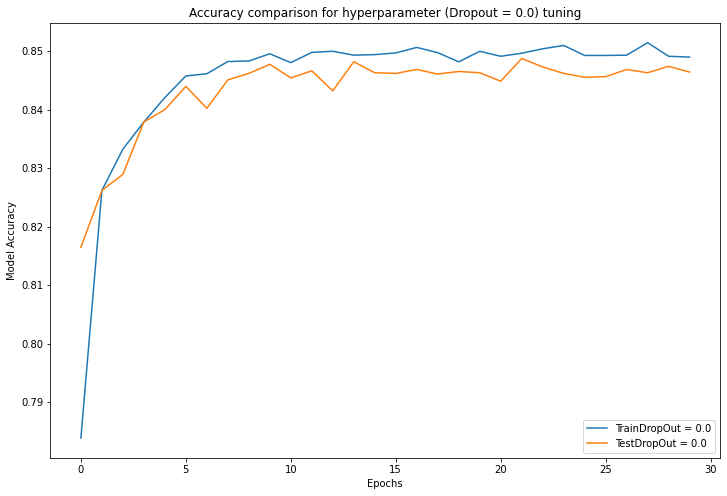

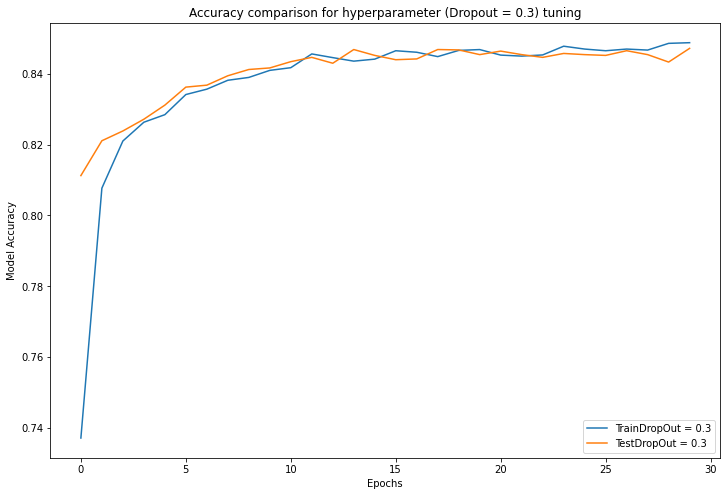

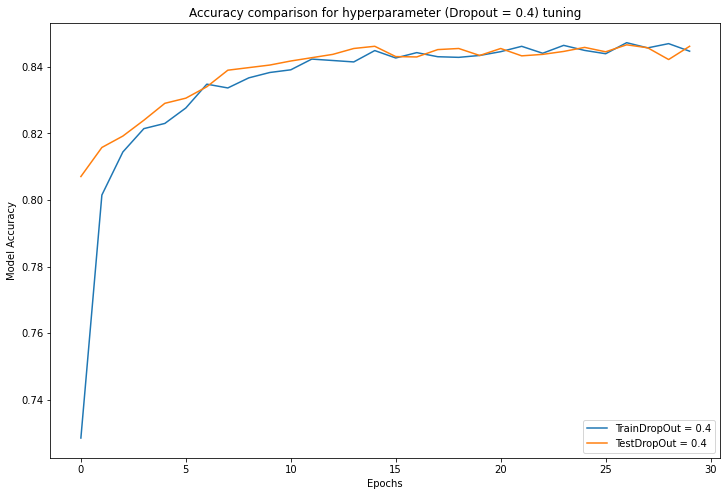

In [62]:
DropOut = ["0.0", "0.3", "0.4"]
labels1Train = ["TrainDropOut = 0.0","TrainDropOut = 0.3","TrainDropOut = 0.4"]
labels1Test = ["TestDropOut = 0.0","TestDropOut = 0.3","TestDropOut = 0.4"]

count = 0
for plot,label in zip(zip(AccuracyTrainDO,AccuracyTestDO),zip(labels1Train,labels1Test)):
    plt.figure(figsize=(12,8))
    plt.title(f"Accuracy comparison for hyperparameter (Dropout = {DropOut[count]}) tuning")
    plt.plot(plot[0], label = label[0])
    plt.plot(plot[1], label = label[1])
    plt.legend(loc = "lower right")
    plt.xlabel("Epochs")
    plt.ylabel("Model Accuracy")
    plt.show()
    count += 1

### Activation Function Tunning:

In [63]:
lossTrainAF = []
lossTestAF = []
AccuracyTrainAF = []
AccuracyTestAF = []
accuracyDictTrainAF = {}
accuracyDictTestAF = {}

In [64]:
# Activation function tunning:
modelCheck2 = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

modelCheck2.summary()

modelCheck2.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model_outputCheck2 = modelCheck2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (X_test, y_test))

# computing training loss for each Epoch and storing in lossTrain variable
lossTrainAF.append(model_outputCheck2.history['loss'])
lossTestAF.append(model_outputCheck2.history['val_loss'])
AccuracyTrainAF.append(model_outputCheck2.history['accuracy'])
AccuracyTestAF.append(model_outputCheck2.history['val_accuracy'])

accuracyDictTrainAF["selu"] = model_outputCheck2.history['accuracy'][-1]
accuracyDictTestAF["selu"] = model_outputCheck2.history['val_accuracy'][-1]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                1232      
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
165/165 [==============================] 

In [65]:
# Activation function tunning:
modelCheck2 = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "relu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "relu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

modelCheck2.summary()

modelCheck2.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model_outputCheck2 = modelCheck2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (X_test, y_test))

# computing training loss for each Epoch and storing in lossTrain variable
lossTrainAF.append(model_outputCheck2.history['loss'])
lossTestAF.append(model_outputCheck2.history['val_loss'])
AccuracyTrainAF.append(model_outputCheck2.history['accuracy'])
AccuracyTestAF.append(model_outputCheck2.history['val_accuracy'])

accuracyDictTrainAF["relu"] = model_outputCheck2.history['accuracy'][-1]
accuracyDictTestAF["relu"] = model_outputCheck2.history['val_accuracy'][-1]

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                1232      
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
165/165 [==============================] 

In [66]:
# Activation function tunning:
modelCheck2 = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "softmax", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "softmax", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

modelCheck2.summary()

modelCheck2.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model_outputCheck2 = modelCheck2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (X_test, y_test))

# computing training loss for each Epoch and storing in lossTrain variable
lossTrainAF.append(model_outputCheck2.history['loss'])
lossTestAF.append(model_outputCheck2.history['val_loss'])
AccuracyTrainAF.append(model_outputCheck2.history['accuracy'])
AccuracyTestAF.append(model_outputCheck2.history['val_accuracy'])

accuracyDictTrainAF["softmax"] = model_outputCheck2.history['accuracy'][-1]
accuracyDictTestAF["softmax"] = model_outputCheck2.history['val_accuracy'][-1]

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                1232      
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                272       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
165/165 [==============================] 

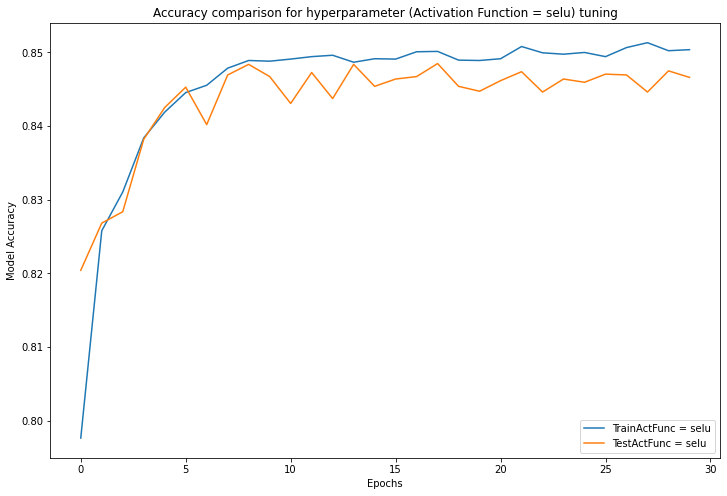

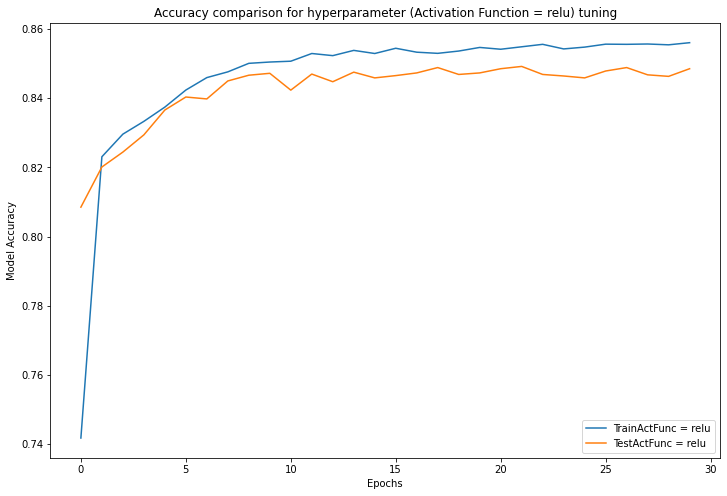

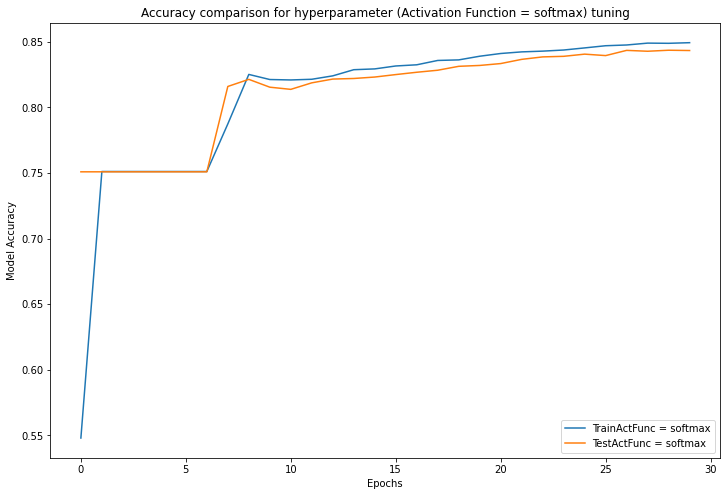

In [67]:
activationList = ["selu", "relu", "softmax"]
labels2Train = ["TrainActFunc = selu","TrainActFunc = relu","TrainActFunc = softmax"]
labels2Test = ["TestActFunc = selu","TestActFunc = relu","TestActFunc = softmax"]

count = 0
for plot,label in zip(zip(AccuracyTrainAF,AccuracyTestAF),zip(labels2Train,labels2Test)):
    plt.figure(figsize=(12,8))
    plt.title(f"Accuracy comparison for hyperparameter (Activation Function = {activationList[count]}) tuning")
    plt.plot(plot[0], label = label[0])
    plt.plot(plot[1], label = label[1])
    plt.legend(loc = "lower right")
    plt.xlabel("Epochs")
    plt.ylabel("Model Accuracy")
    plt.show()
    count += 1

### Optimizer tunning:

In [68]:
lossTrainO = []
lossTestO = []
AccuracyTrainO = []
AccuracyTestO = []
accuracyDictTrainO = {}
accuracyDictTestO = {}

In [69]:
# Optimizer tunning:
modelCheck3 = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

modelCheck3.summary()

modelCheck3.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model_outputCheck3 = modelCheck3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (X_test, y_test))

# computing training loss for each Epoch and storing in lossTrain variable
lossTrainO.append(model_outputCheck3.history['loss'])
lossTestO.append(model_outputCheck3.history['val_loss'])
AccuracyTrainO.append(model_outputCheck3.history['accuracy'])
AccuracyTestO.append(model_outputCheck3.history['val_accuracy'])

accuracyDictTrainO["Adam"] = model_outputCheck3.history['accuracy'][-1]
accuracyDictTestO["Adam"] = model_outputCheck3.history['val_accuracy'][-1]

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                1232      
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
165/165 [==============================] 

In [70]:
# Optimizer tunning:
modelCheck3 = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

modelCheck3.summary()

modelCheck3.compile(loss = "BinaryCrossentropy", optimizer=SGD(learning_rate=0.001, momentum=0.9), metrics=["accuracy"])
model_outputCheck3 = modelCheck3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (X_test, y_test))

# computing training loss for each Epoch and storing in lossTrain variable
lossTrainO.append(model_outputCheck3.history['loss'])
lossTestO.append(model_outputCheck3.history['val_loss'])
AccuracyTrainO.append(model_outputCheck3.history['accuracy'])
AccuracyTestO.append(model_outputCheck3.history['val_accuracy'])

accuracyDictTrainO["SGD"] = model_outputCheck3.history['accuracy'][-1]
accuracyDictTestO["SGD"] = model_outputCheck3.history['val_accuracy'][-1]

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                1232      
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
165/165 [==============================] 

In [71]:
# Optimizer function tunning:
modelCheck3 = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

modelCheck3.summary()

modelCheck3.compile(loss = "BinaryCrossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=["accuracy"])
model_outputCheck3 = modelCheck3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (X_test, y_test))

# computing training loss for each Epoch and storing in lossTrain variable
lossTrainO.append(model_outputCheck3.history['loss'])
lossTestO.append(model_outputCheck3.history['val_loss'])
AccuracyTrainO.append(model_outputCheck3.history['accuracy'])
AccuracyTestO.append(model_outputCheck3.history['val_accuracy'])

accuracyDictTrainO["RMSprop"] = model_outputCheck3.history['accuracy'][-1]
accuracyDictTestO["RMSprop"] = model_outputCheck3.history['val_accuracy'][-1]

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                1232      
                                                                 
 dropout_18 (Dropout)        (None, 16)                0         
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
165/165 [==============================] 

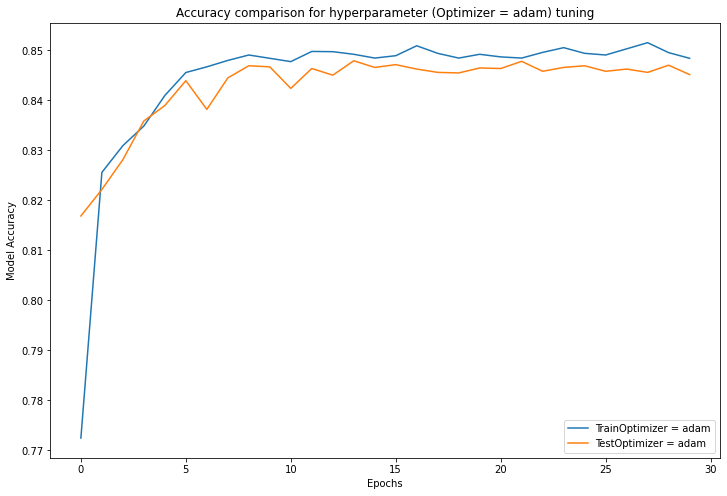

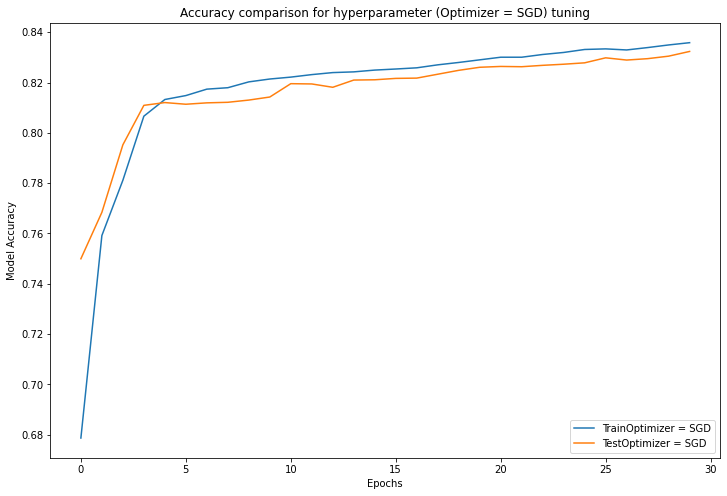

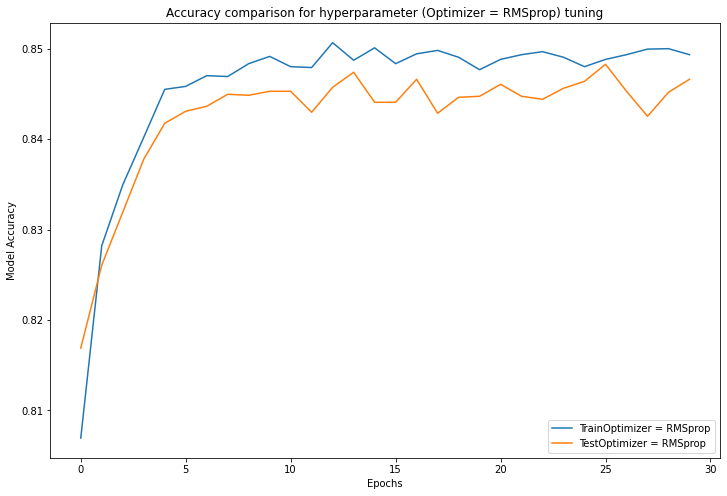

In [72]:
OptimizerList = ["adam", "SGD", "RMSprop"]
labels3Train = ["TrainOptimizer = adam","TrainOptimizer = SGD","TrainOptimizer = RMSprop"]
labels3Test = ["TestOptimizer = adam","TestOptimizer = SGD","TestOptimizer = RMSprop"]

count = 0
for plot,label in zip(zip(AccuracyTrainO,AccuracyTestO),zip(labels3Train,labels3Test)):
    plt.figure(figsize=(12,8))
    plt.title(f"Accuracy comparison for hyperparameter (Optimizer = {OptimizerList[count]}) tuning")
    plt.plot(plot[0], label = label[0])
    plt.plot(plot[1], label = label[1])
    plt.legend(loc = "lower right")
    plt.xlabel("Epochs")
    plt.ylabel("Model Accuracy")
    plt.show()
    count += 1

In [73]:
print(accuracyDictTestDO)
print(accuracyDictTestAF)
print(accuracyDictTestO)

{'0.0': 0.8463918566703796, '0.3': 0.8471654057502747, '0.4': 0.8461708426475525}
{'selu': 0.8466128706932068, 'relu': 0.8484915494918823, 'softmax': 0.8434081077575684}
{'Adam': 0.8451762795448303, 'SGD': 0.8323571681976318, 'RMSprop': 0.8466128706932068}


## 1) Earlystopping method:

In [74]:
%%time
BATCH_SIZE = 128
EPOCHS = 30

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 1)

modelES = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

model.summary()

modelES.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
history = modelES.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks = [callback], validation_data = (X_test, y_test))

AccuracyTrain_EarlyStop = history.history["accuracy"]
AccuracyTest_EarlyStop = history.history["val_accuracy"]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1232      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
165/165 [==============================] - 

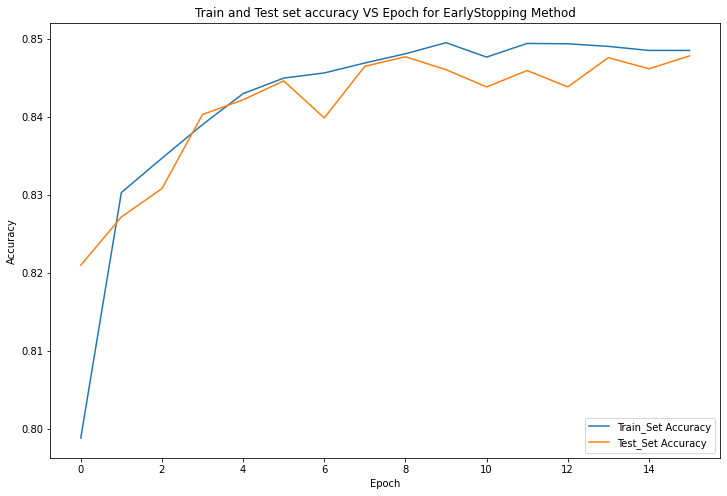

In [75]:
plt.figure(figsize= (12,8))
plt.title("Train and Test set accuracy VS Epoch for EarlyStopping Method")
plt.plot(AccuracyTrain_EarlyStop, label = "Train_Set Accuracy")
plt.plot(AccuracyTest_EarlyStop, label = "Test_Set Accuracy")
plt.legend(loc = "lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

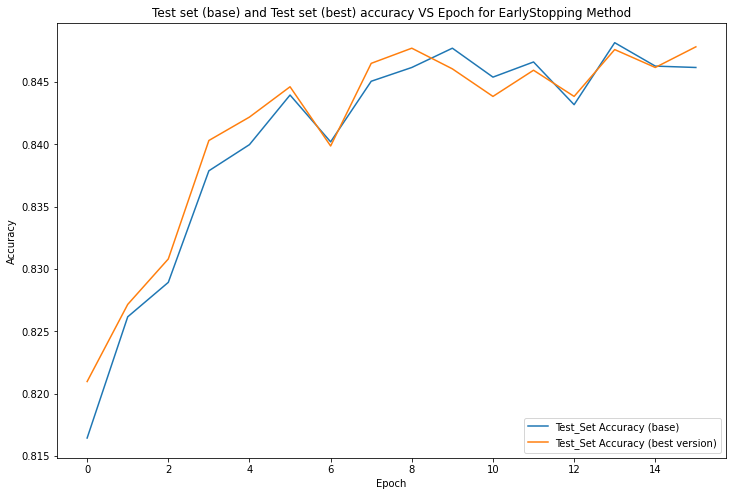

In [76]:
plt.figure(figsize= (12,8))
plt.title("Test set (base) and Test set (best) accuracy VS Epoch for EarlyStopping Method")
plt.plot(AccuracyTest[:len(AccuracyTest_EarlyStop)], label = "Test_Set Accuracy (base)")
plt.plot(AccuracyTest_EarlyStop, label = "Test_Set Accuracy (best version)")
plt.legend(loc = "lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

## 2) K-folds method:

In [77]:
from sklearn.model_selection import StratifiedKFold

In [78]:
X_val = X.values
y_val = y.values

In [79]:
%%time
KFolds = StratifiedKFold(5, shuffle=True, random_state=1)
EPOCHS = 30
BATCH_SIZE = 128
fold = 0

trainSet_AccuracyKF = []
testSet_AccuracyKF = []

for trainSet, testSet in KFolds.split(X,y):
    fold += 1
    print(f"fold # {fold}")

    X_train = X_val[trainSet]
    y_train = y_val[trainSet]
    X_test = X_val[testSet]
    y_test = y_val[testSet]

    modelKF = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])
    
    modelKF.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
    KFModelHist = modelKF.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = EPOCHS, batch_size = BATCH_SIZE)
    
    trainSet_AccuracyKF.append(KFModelHist.history["accuracy"])
    testSet_AccuracyKF.append(KFModelHist.history["val_accuracy"])

fold # 1
Epoch 1/30
189/189 [==============================] - 1s 3ms/step - loss: 0.4366 - accuracy: 0.7903 - val_loss: 0.3759 - val_accuracy: 0.8202
Epoch 2/30
189/189 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8264 - val_loss: 0.3581 - val_accuracy: 0.8308
Epoch 3/30
189/189 [==============================] - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8334 - val_loss: 0.3464 - val_accuracy: 0.8400
Epoch 4/30
189/189 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8388 - val_loss: 0.3436 - val_accuracy: 0.8432
Epoch 5/30
189/189 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8440 - val_loss: 0.3342 - val_accuracy: 0.8478
Epoch 6/30
189/189 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8457 - val_loss: 0.3311 - val_accuracy: 0.8502
Epoch 7/30
189/189 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8466 - val_loss: 0.3311 - val_accuracy: 0.85

189/189 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8494 - val_loss: 0.3222 - val_accuracy: 0.8501
Epoch 26/30
189/189 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8489 - val_loss: 0.3229 - val_accuracy: 0.8490
Epoch 27/30
189/189 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8486 - val_loss: 0.3236 - val_accuracy: 0.8503
Epoch 28/30
189/189 [==============================] - 1s 3ms/step - loss: 0.3234 - accuracy: 0.8494 - val_loss: 0.3213 - val_accuracy: 0.8506
Epoch 29/30
189/189 [==============================] - 1s 3ms/step - loss: 0.3216 - accuracy: 0.8500 - val_loss: 0.3219 - val_accuracy: 0.8496
Epoch 30/30
189/189 [==============================] - 1s 3ms/step - loss: 0.3223 - accuracy: 0.8510 - val_loss: 0.3222 - val_accuracy: 0.8481
fold # 5
Epoch 1/30
189/189 [==============================] - 1s 3ms/step - loss: 0.4505 - accuracy: 0.7773 - val_loss: 0.3917 - val_accuracy: 0.8198
Epo

In [80]:
trainSet_AccuracyKF = np.array(trainSet_AccuracyKF).mean(axis = 0).tolist()

In [81]:
testSet_AccuracyKF = np.array(testSet_AccuracyKF).mean(axis = 0).tolist()

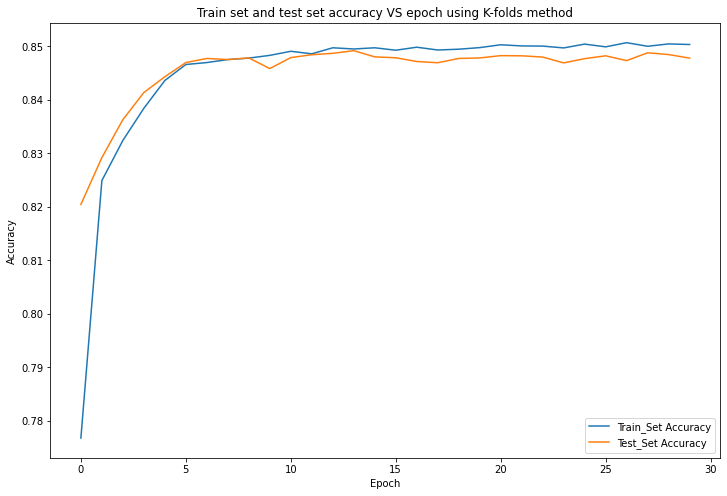

In [82]:
plt.figure(figsize=(12,8))
plt.title("Train set and test set accuracy VS epoch using K-folds method")
plt.plot(trainSet_AccuracyKF, label = "Train_Set Accuracy")
plt.plot(testSet_AccuracyKF, label = "Test_Set Accuracy")
plt.legend(loc= "lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

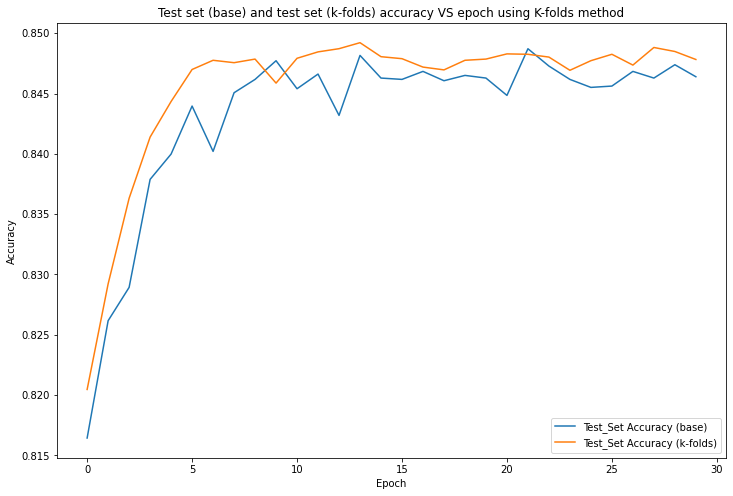

In [83]:
plt.figure(figsize=(12,8))
plt.title("Test set (base) and test set (k-folds) accuracy VS epoch using K-folds method")
plt.plot(AccuracyTest, label = "Test_Set Accuracy (base)")
plt.plot(testSet_AccuracyKF, label = "Test_Set Accuracy (k-folds)")
plt.legend(loc= "lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

## 3) ShuffleSplit method

In [84]:
from sklearn.model_selection import ShuffleSplit

In [85]:
X_val = X.values
y_val = y.values

In [86]:
%%time
SS = ShuffleSplit(5, test_size=0.25, random_state=1)
EPOCHS = 30
BATCH_SIZE = 128
shuffle = 0

trainSet_AccuracySS = []
testSet_AccuracySS = []

for train_index, test_index in SS.split(X):
    shuffle += 1
    print(f"shuffle # {shuffle}")

    X_train = X_val[train_index]
    y_train = y_val[train_index]
    X_test = X_val[test_index]
    y_test = y_val[test_index]

    modelSS = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])
    
    modelSS.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
    SSModelHist = modelSS.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = EPOCHS, batch_size = BATCH_SIZE)
    
    trainSet_AccuracySS.append(SSModelHist.history["accuracy"])
    testSet_AccuracySS.append(SSModelHist.history["val_accuracy"])

shuffle # 1
Epoch 1/30
177/177 [==============================] - 1s 4ms/step - loss: 0.4116 - accuracy: 0.8022 - val_loss: 0.3808 - val_accuracy: 0.8198
Epoch 2/30
177/177 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8305 - val_loss: 0.3646 - val_accuracy: 0.8308
Epoch 3/30
177/177 [==============================] - 1s 3ms/step - loss: 0.3492 - accuracy: 0.8355 - val_loss: 0.3528 - val_accuracy: 0.8361
Epoch 4/30
177/177 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8402 - val_loss: 0.3447 - val_accuracy: 0.8391
Epoch 5/30
177/177 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8462 - val_loss: 0.3449 - val_accuracy: 0.8380
Epoch 6/30
177/177 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8468 - val_loss: 0.3368 - val_accuracy: 0.8437
Epoch 7/30
177/177 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8487 - val_loss: 0.3338 - val_accuracy: 0

177/177 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.8511 - val_loss: 0.3277 - val_accuracy: 0.8459
Epoch 26/30
177/177 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8517 - val_loss: 0.3238 - val_accuracy: 0.8474
Epoch 27/30
177/177 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8503 - val_loss: 0.3232 - val_accuracy: 0.8474
Epoch 28/30
177/177 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8496 - val_loss: 0.3252 - val_accuracy: 0.8464
Epoch 29/30
177/177 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8503 - val_loss: 0.3236 - val_accuracy: 0.8462
Epoch 30/30
177/177 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8486 - val_loss: 0.3243 - val_accuracy: 0.8471
shuffle # 5
Epoch 1/30
177/177 [==============================] - 2s 7ms/step - loss: 0.4382 - accuracy: 0.7921 - val_loss: 0.3825 - val_accuracy: 0.8193


In [87]:
trainSet_AccuracySS = np.array(trainSet_AccuracySS).mean(axis = 0).tolist()

In [88]:
testSet_AccuracySS = np.array(testSet_AccuracySS).mean(axis = 0).tolist()

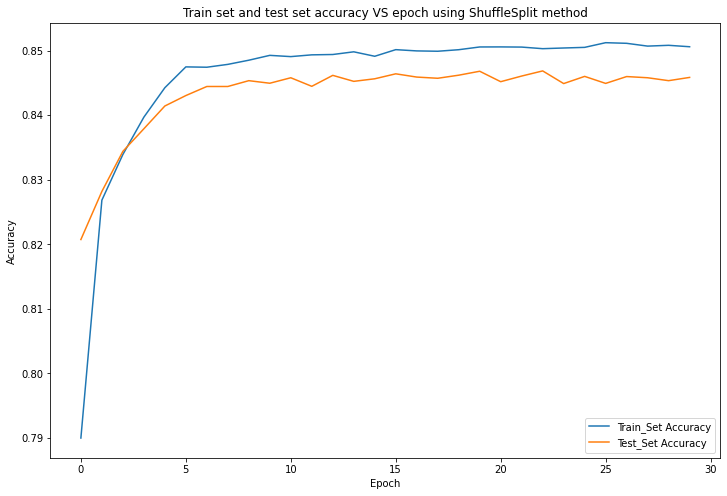

In [89]:
plt.figure(figsize=(12,8))
plt.title("Train set and test set accuracy VS epoch using ShuffleSplit method")
plt.plot(trainSet_AccuracySS, label = "Train_Set Accuracy")
plt.plot(testSet_AccuracySS, label = "Test_Set Accuracy")
plt.legend(loc= "lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

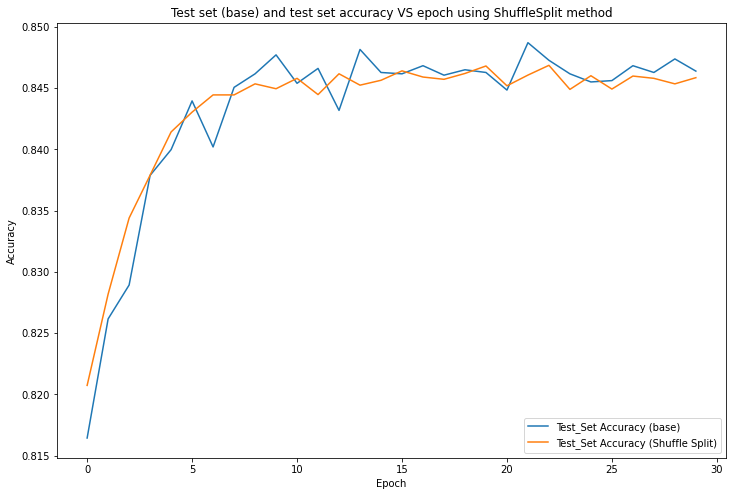

In [90]:
plt.figure(figsize=(12,8))
plt.title("Test set (base) and test set accuracy VS epoch using ShuffleSplit method")
plt.plot(AccuracyTest, label = "Test_Set Accuracy (base)")
plt.plot(testSet_AccuracySS, label = "Test_Set Accuracy (Shuffle Split)")
plt.legend(loc= "lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

## 4) L2 Regularizers (alpha = 0.01)

In [91]:
from keras.regularizers import l2

In [92]:
%%time

EPOCHS = 30
BATCH_SIZE = 128

model_l2 = keras.Sequential(
    [
        # Input Layer
        keras.Input(shape = (input_shape[1],)),
        # Hidden layer 1
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1), kernel_regularizer=l2(0.00005)),
        # Dropout layer 1
        layers.Dropout(0.0),
        # Hidden layer 2:
        layers.Dense(16, activation= "selu", kernel_initializer= GlorotUniform(seed=1), kernel_regularizer=l2(0.00005)),
        # Dropout layer 2:
        layers.Dropout(0.0),
        # Output layer:
        layers.Dense(1, activation= "sigmoid", kernel_initializer= GlorotUniform(seed=1))
    ])

model_l2.summary()

model_l2.compile(loss = "BinaryCrossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model_output_l2 = model_l2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data = (X_test, y_test))

trainSet_Accuracyl2 = model_output_l2.history["accuracy"]
testSet_Accuracyl2 = model_output_l2.history["val_accuracy"]

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 16)                1232      
                                                                 
 dropout_42 (Dropout)        (None, 16)                0         
                                                                 
 dense_64 (Dense)            (None, 16)                272       
                                                                 
 dropout_43 (Dropout)        (None, 16)                0         
                                                                 
 dense_65 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
177/177 [==============================]

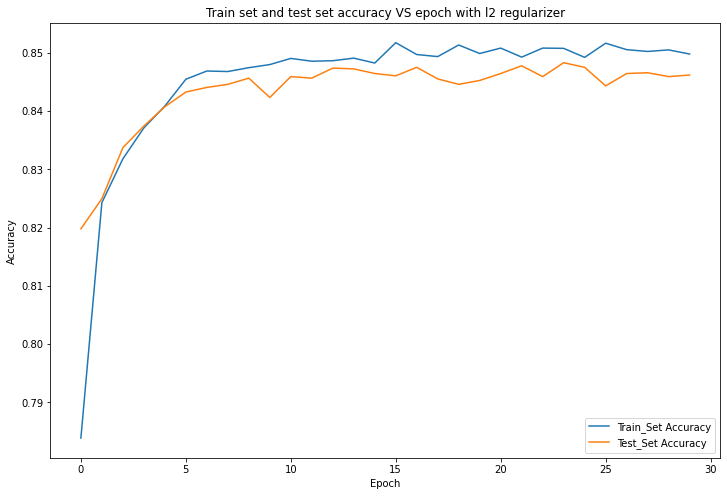

In [93]:
plt.figure(figsize=(12,8))
plt.title("Train set and test set accuracy VS epoch with l2 regularizer")
plt.plot(trainSet_Accuracyl2, label = "Train_Set Accuracy")
plt.plot(testSet_Accuracyl2, label = "Test_Set Accuracy")
plt.legend(loc= "lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

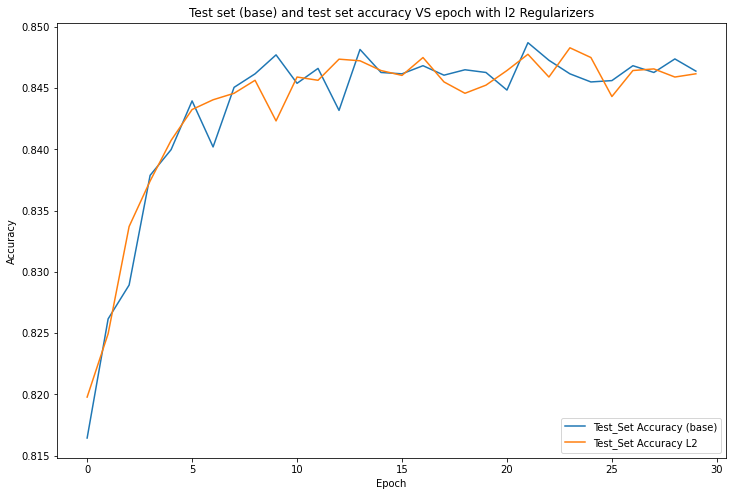

In [94]:
plt.figure(figsize=(12,8))
plt.title("Test set (base) and test set accuracy VS epoch with l2 Regularizers")
plt.plot(AccuracyTest, label = "Test_Set Accuracy (base)")
plt.plot(testSet_Accuracyl2, label = "Test_Set Accuracy L2")
plt.legend(loc= "lower right")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [95]:
testSet_AccuracyKF

[0.8204694986343384,
 0.8292221307754517,
 0.8363170266151428,
 0.8413896322250366,
 0.8443403363227844,
 0.8469927787780762,
 0.8477551817893982,
 0.8475562930107117,
 0.8478546738624573,
 0.8458654522895813,
 0.8479210257530212,
 0.848451566696167,
 0.8487167477607727,
 0.8492139935493469,
 0.8480535745620728,
 0.8478877902030945,
 0.8471916317939758,
 0.8469594955444336,
 0.8477553009986878,
 0.8478546261787414,
 0.848285686969757,
 0.848252534866333,
 0.8480205178260803,
 0.8469263672828674,
 0.8477220892906189,
 0.8482526302337646,
 0.8473573684692383,
 0.848816192150116,
 0.8484846115112304,
 0.8478214859962463]

In [96]:
testSet_AccuracySS

[0.8207399606704712,
 0.8281925439834594,
 0.83439861536026,
 0.8378994822502136,
 0.8414268732070923,
 0.8430446863174439,
 0.8444503426551819,
 0.8444503307342529,
 0.8453520774841309,
 0.8449542641639709,
 0.8458029270172119,
 0.8444768786430359,
 0.8461742520332336,
 0.8452459931373596,
 0.8456438183784485,
 0.8464129447937012,
 0.8459090232849121,
 0.8457233786582947,
 0.8462007761001586,
 0.84681077003479,
 0.8451929569244385,
 0.8460681676864624,
 0.8468638181686401,
 0.8449012160301208,
 0.8460151314735412,
 0.8449277281761169,
 0.8459885954856873,
 0.8458029627799988,
 0.8453520774841309,
 0.845855987071991]